#### Topic: Hw3, Machine-Learning-2019-fall
#### Date: 2019/10/05
#### Author: 林俊儒(B063040058), 王譽鈞(B065040034)

---
#### [ 讀入 CSV 檔 ]

In [1]:
import pandas as pd
data = pd.read_csv('liver.csv')  # 讀入檔案
(total_row, total_col) = data.shape
print("總col數:", total_col)
print("總row數:", total_row)

總col數: 7
總row數: 345


---
#### [ 1. 將資料切割成訓練集 70%,預測集 30% ]
##### 在下面這個cell 先把資料切好
##### 把之後要用的『純GPT』『純GOT』『GPT/GOT』和『 GOT/GPT』也先切好

In [2]:
import numpy as np

test_bound = ( total_row *7)//10 #70%的邊界
selector_index = total_col -1

x_train =  pd.DataFrame( data, columns = data.columns[0:selector_index])[:test_bound]
x_test  =  pd.DataFrame( data, columns = data.columns[0:selector_index])[test_bound:]

y_train =  np.array( data[ data.columns[selector_index] ][:test_bound] )
y_test  =  np.array( data[ data.columns[selector_index] ][test_bound:] )

GOT_train = pd.DataFrame( x_train, columns = ['GOT'])
GOT_test  = pd.DataFrame( x_test, columns = ['GOT'])

GPT_train = pd.DataFrame( x_train, columns = ['GPT'])
GPT_test  = pd.DataFrame( x_test, columns = ['GPT'])

GPTGOT_train = [[x/y] for x,y in zip( x_train['GPT'],x_train['GOT'])]
GPTGOT_test  = [[x/y] for x,y in zip( x_test['GPT'],x_test['GOT'])]

GOTGPT_train = [[y/x] for x,y in zip( x_train['GPT'],x_train['GOT'])]
GOTGPT_test  = [[y/x] for x,y in zip( x_test['GPT'],x_test['GOT'])]

---
#### 分別使用Logistic regression 及 Bayes 兩種方法來預估，
#### 並比較那一種模型較佳。
##### 這裡我們使用 sklearn 的 LogisticRegression() 和 BernoulliNB()
##### 並分別 fit() 後，呼叫 score() 印出預測正確率

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

lr = LogisticRegression( solver = "lbfgs" ).fit(x_train,y_train)
bnl = BernoulliNB().fit(x_train,y_train)

print("========================================================")
print("LogisticRegression 正確率:", lr.score(x_test, y_test))
print("")
print("Bayes 正確率:", bnl.score(x_test, y_test))
print("========================================================")

LogisticRegression 正確率: 0.7115384615384616

Bayes 正確率: 0.6057692307692307


#### 從上面這個cell執行的結果可以看到
#### 對於我們的資料集
#### LogisticRegression方法 以約7成的準確率 優於 bayes方法
---
---
#### [ 2.根據臨床經驗中 GPT/GOT 和 GOT/GPT 兩種比值,可作為判斷肝病的參考依據。]
#### [ 請找出這兩個比值與預測目標(Selector)的相關係數 ]
#### [ 並比較單純 GTP 與預測目標,以及 GOT 與預測目標的相關係數大小 ]
##### 這裡我們再產生一個新的data
##### 內容為 把 "GTP 和 GOP" 抽換成 "GPT/GOT 和 GOT/GPT"
##### 並利用 seaborn 的 hitmap() 印出個別與 selector 之間的相關係數
---
##### 下面這個cell 先印原始資料的heatmap

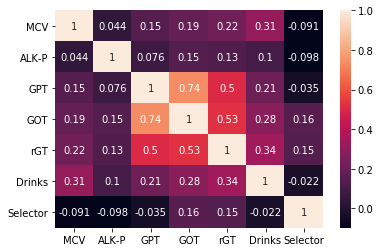

In [9]:
import seaborn as sns
correlation_matrix = data.corr()
axes_obj = sns.heatmap(correlation_matrix, annot=True)

##### 從圖上可以看到原始data的相關係數 
##### Selector與GPT為[-0.035], Selector與GOT為[0.16]
---
##### 接著產生抽換過的新的 new_data
##### 並也印出heatmap

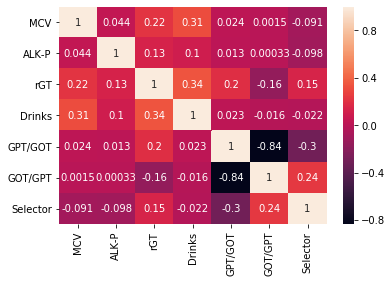

In [5]:
GPTGOT = [x/y for x,y in zip( data['GPT'],data['GOT'])]
GOTGPT = [y/x for x,y in zip( data['GPT'],data['GOT'])]

new_data =  pd.DataFrame( data )
new_data = new_data.drop('GPT', axis=1)
new_data = new_data.drop('GOT', axis=1)
new_data = new_data.drop('Selector', axis=1)
new_data['GPT/GOT'] = GPTGOT
new_data['GOT/GPT'] = GOTGPT
new_data['Selector'] = data['Selector']

correlation_matrix = new_data.corr()
axes_obj = sns.heatmap(correlation_matrix, annot=True)

##### 從圖上可以看到新的new_data的相關係數 
##### Selector與 GPT/GOT 為[-0.3]
##### Selector與 GOT/GPT 為[0.24]
##### 相對於 再往前一個cell的 GPT[-0.035] , GOT[0.16]
##### 明顯絕對值較大，更能有效幫助判斷肝病
---
---
#### [ 3.新增前述兩項比值做為新加入特徵,取代原來 GTP 與 GOP 特徵 ]
#### [ 再重新做一次預測,比較特徵轉換前後的預測準確度 ]
##### 這裡我們把原 data 和剛剛產生的新 new_data
##### 分別丟到 LogisticRegression 和 BernoulliNB 
##### 再測一次score

In [6]:
## 測試用程式碼
#lr = LogisticRegression( solver = "lbfgs" ).fit(GOT_train, y_train)
#print("GOT_train right_rate: ", lr.score(GOT_test, y_test))
#lr = LogisticRegression( solver = "lbfgs" ).fit(GPT_train, y_train)
#print("GPT_train right_rate: ", lr.score(GPT_test, y_test))
#lr = LogisticRegression( solver = "lbfgs" ).fit(GPTGOT_train, y_train)
#print("GPTGOT_train right_rate: ", lr.score(GPTGOT_test, y_test))
#lr = LogisticRegression( solver = "lbfgs" ).fit(GOTGPT_train, y_train)
#print("GOTGPT_train right_rate: ", lr.score(GOTGPT_test, y_test))

In [7]:
lr = LogisticRegression( solver = "lbfgs" ).fit(x_train,y_train)
bnl = BernoulliNB().fit(x_train,y_train)

print("========================================================")
print("原始資料：")
print("LogisticRegression 正確率:", lr.score(x_test, y_test))
print("Bayes 正確率:", bnl.score(x_test, y_test))
print("--------------------------------------------------------")

new_data_train = pd.DataFrame( new_data, columns = new_data.columns[0:selector_index])[:test_bound]
new_data_test  = pd.DataFrame( new_data, columns = new_data.columns[0:selector_index])[test_bound:]
lr = LogisticRegression( solver = "lbfgs" ).fit(new_data_train,y_train)
bnl = BernoulliNB().fit(new_data_train,y_train)

print("抽換過的新資料：")
print("LogisticRegression 正確率:", lr.score(new_data_test, y_test))
print("Bayes 正確率:", bnl.score(new_data_test, y_test))
print("========================================================")

原始資料：
LogisticRegression 正確率: 0.7115384615384616
Bayes 正確率: 0.6057692307692307
--------------------------------------------------------
抽換過的新資料：
LogisticRegression 正確率: 0.7403846153846154
Bayes 正確率: 0.6057692307692307


##### 從執行結果可以看到
##### 抽換成 "GPT/GOT 和 GOT/GPT" 的新 new_data
##### 在 LogisticRegression 正確率 有提昇 3個百分比
---